# EDA

In [75]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
import sidetable

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Estadísticos
# ------------------------------------------------------------------------------
from scipy import stats
#import researchpy as rp
from scipy.stats import levene

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

plt.rcParams["figure.figsize"] = (10,8) 

In [76]:
df= pd.read_csv("datos/bikes.csv", index_col=0)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [77]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,spring,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,spring,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,spring,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,spring,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,spring,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [78]:
df.shape

(730, 16)

In [79]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [80]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000


In [81]:
print(len(df.describe().T))

14


In [82]:
df.describe(include="object").T

,count,unique,top,freq
dteday,730,730,01-01-2018,1
season,730,4,autumn,188


In [83]:
df.dtypes

instant         int64
dteday         object
season         object
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

## Valores únicos

In [84]:
df_categoricas = df.select_dtypes(include="object")

In [85]:
# Creamos un Dataframe a partir de un diccionario.
# Creamos dos listas para meter el nombre de la variable y los valores unicos
variable = []
n_uniques = []
for col in df_categoricas.columns: # Iteramos por las columnas de DF categoricas y apendeamos los distintos valores
    variable.append(col)
    n_uniques.append(df_categoricas[col].unique())
datos = {"variable": variable, "n_uniques": n_uniques} # Creamos el diccionario
df_valoresunicos = pd.DataFrame.from_dict(datos)
df_valoresunicos

,variable,n_uniques
0,dteday,"[01-01-2018, 02-01-2018, 03-01-2018, 04-01-201..."
1,season,"[spring, summer, autumn, winter]"


In [86]:
df_agrupadas = df[['holiday', 'weekday',
       'workingday', 'weathersit']]
df_agrupadas.head()

,holiday,weekday,workingday,weathersit
0,0,6,0,2
1,0,0,0,2
2,0,1,1,1
3,0,2,1,1
4,0,3,1,1


In [87]:
# Creamos un Dataframe a partir de un diccionario.
# Creamos dos listas para meter el nombre de la variable y los valores unicos
variable = []
n_uniques = []
for col in df_agrupadas.columns: # Iteramos por las columnas de DF categoricas y apendeamos los distintos valores
    variable.append(col)
    n_uniques.append(df_agrupadas[col].unique())
datos = {"variable": variable, "n_uniques": n_uniques} # Creamos el diccionario
df_unicosagrupadas = pd.DataFrame.from_dict(datos)
df_unicosagrupadas

,variable,n_uniques
0,holiday,"[0, 1]"
1,weekday,"[6, 0, 1, 2, 3, 4, 5]"
2,workingday,"[0, 1]"
3,weathersit,"[2, 1, 3]"


In [88]:
df_agrupadas.dtypes

holiday       int64
weekday       int64
workingday    int64
weathersit    int64
dtype: object

In [89]:
semana= pd.crosstab(df["weekday"],df["workingday"] , margins=False)
semana

workingday,0,1
weekday,,
0,105,0
1,15,90
2,1,103
3,1,102
4,2,102
5,2,102
6,105,0


Sábado 6 
Domingo 0

## Duplicados

In [90]:
df.duplicated().sum()

0

## Nulos

In [91]:
df.stb.missing()

,missing,total,percent
instant,0,730,0.0
dteday,0,730,0.0
season,0,730,0.0
yr,0,730,0.0
mnth,0,730,0.0
holiday,0,730,0.0
weekday,0,730,0.0
workingday,0,730,0.0
weathersit,0,730,0.0
temp,0,730,0.0


## Frecuencia de Season

In [92]:
df.stb.freq(["season"], thresh=100)

,season,count,percent,cumulative_count,cumulative_percent
0,autumn,188,25.753425,188,25.753425
1,summer,184,25.205479,372,50.958904
2,spring,180,24.657534,552,75.616438
3,winter,178,24.383562,730,100.000000


In [93]:
df.stb.freq(["season", "dteday"], thresh=100)

,season,dteday,count,percent,cumulative_count,cumulative_percent
0,winter,31-10-2019,1,0.136986,1,0.136986
1,winter,31-10-2018,1,0.136986,2,0.273973
2,winter,30-11-2019,1,0.136986,3,0.410959
3,winter,30-11-2018,1,0.136986,4,0.547945
4,winter,30-10-2019,1,0.136986,5,0.684932
...,...,...,...,...,...,...
725,autumn,01-09-2018,1,0.136986,726,99.452055
726,autumn,01-08-2019,1,0.136986,727,99.589041
727,autumn,01-08-2018,1,0.136986,728,99.726027
728,autumn,01-07-2019,1,0.136986,729,99.863014


In [94]:
seasons= pd.crosstab(df['season'],df['mnth'] , margins=False)
seasons

mnth,1,2,3,4,5,6,7,8,9,10,11,12
season,,,,,,,,,,,,
autumn,0,0,0,0,0,20,62,62,44,0,0,0
spring,62,56,40,0,0,0,0,0,0,0,0,22
summer,0,0,22,60,62,40,0,0,0,0,0,0
winter,0,0,0,0,0,0,0,0,16,62,60,40


Estaciones no coinciden los meses

In [95]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

## Detección de outliers

In [96]:
# Vamos a comprobar si nuestras variables numéricas tienen outliers:
df_numericas = df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']]
df_numericas.head(2)

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331,654,985
1,14.902598,17.68695,69.6087,16.652113,131,670,801


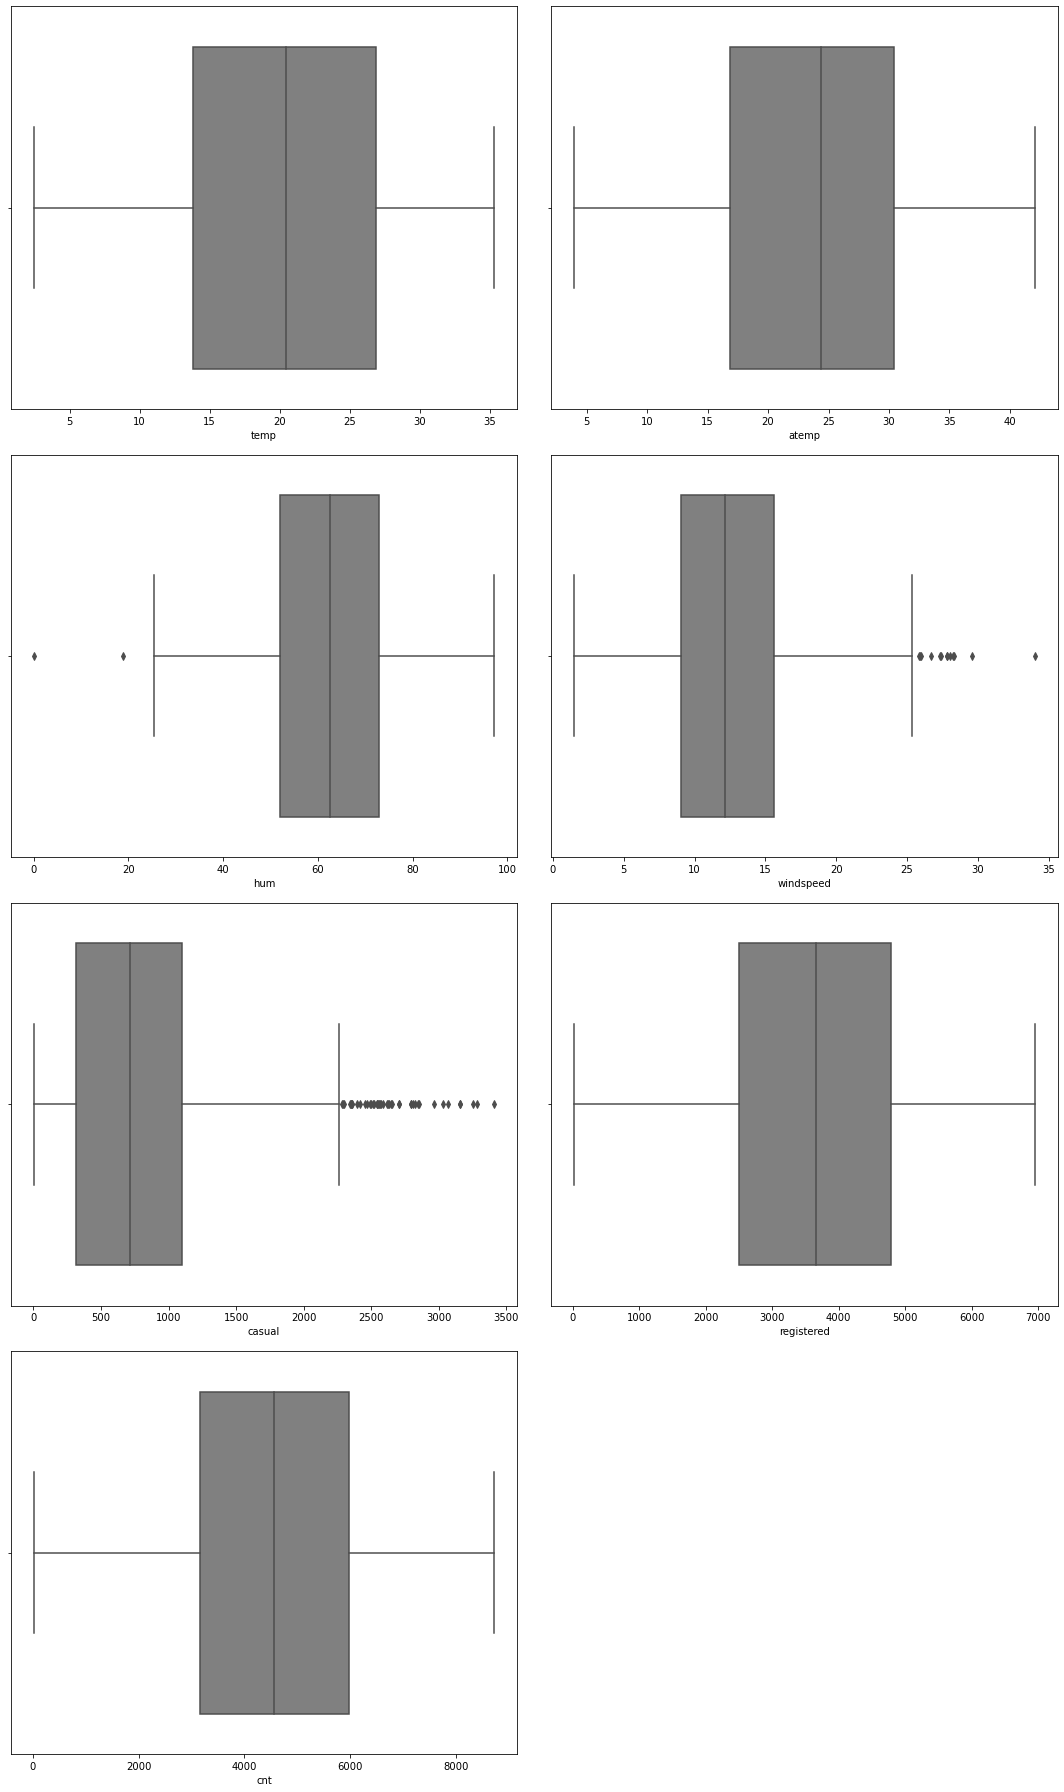

In [136]:
fig, axes = plt.subplots(4, 2, figsize=(15,25))

axes = axes.flat

for indice, columna in enumerate(df_numericas.columns):
    sns.boxplot(x = df_numericas[columna], data = df, ax=axes[indice], color = "grey"); # para trazar una línea de densidad

    
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

In [98]:
df["casual"].value_counts()

120     4
968     4
639     3
163     3
775     3
       ..
2521    1
1935    1
783     1
688     1
364     1
Name: casual, Length: 605, dtype: int64

In [99]:
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,spring,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,spring,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,spring,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,spring,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,spring,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [100]:
df['dteday'] = pd.to_datetime(df['dteday'])

In [101]:
df.dtypes

instant                int64
dteday        datetime64[ns]
season                object
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

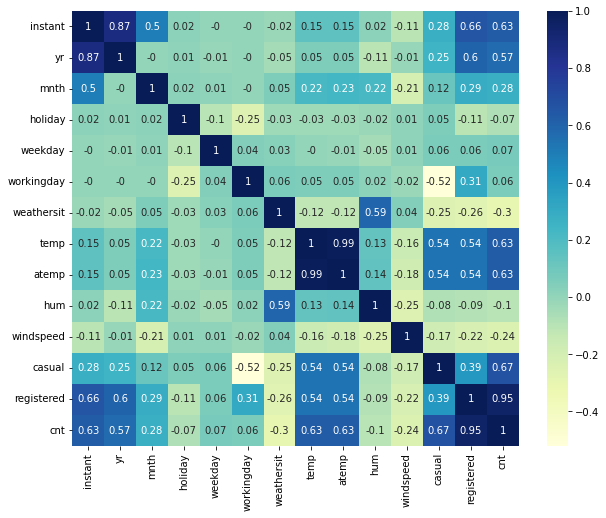

In [102]:
sns.heatmap(round(df.corr(),2), 
           cmap = "YlGnBu",
           annot = True);

El número de bicicletas alquiladas al día varía según:
_______________________________________________________________________________________________________
- Si es un festivo o no
- Según la temperatura, frío que pela.
- El año para los registrados.
Hipótesis: registrados tienen el hábito de usar la bici
- Los casuales cogen más bicicletas en fines de semana que entre semana.

Diferencia en usuarios casuales en función de si es o no día laborable.


Variable respuesta ==> cnt: count of total rental bikes including both casual and registered

## Renombrar columnas

In [103]:
df.reset_index(inplace=True)

In [104]:
cambio_columnas = {col :  col.lower().strip().replace(" ","_") for col in df.columns}

In [105]:
df.rename(columns = cambio_columnas, inplace=True)

In [106]:
df.columns

Index(['index', 'instant', 'dteday', 'season', 'yr', 'mnth', 'holiday',
       'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')

### Limpieza columna estaciones

In [107]:
df['dteday'] = pd.to_datetime(df['dteday'])

In [108]:
df['dteday'] = pd.to_datetime(df['dteday'])
def season_of_date(date):
    year = str(date.year)
    seasons = {'spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'autumn': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'
df.insert(3,"estaciones", df['dteday'].map(season_of_date) )




In [109]:
df.head(2)

,index,instant,dteday,estaciones,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,1,2018-01-01,winter,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,2,2018-02-01,winter,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


### Limpieza días de la semana

In [110]:
def dia_semana_num(dia):
    # Función para obtener el número de día, según la fecha
    # Codificado 0-monday, 1-tuesday, hasta 6-sunday
    return dia.weekday()


In [111]:
df["weekday_num"] = df["dteday"].apply(dia_semana_num)

In [112]:
def dia_semana_cat(dia):
    # Función para obtener el nombre del día
    if dia == 0:
        return "monday"
    elif dia == 1:
        return "tuesday"
    elif dia == 2:
        return "wednesday"
    elif dia == 3:
        return "thursday"
    elif dia == 4:
        return "friday"
    elif dia == 5:
        return "saturday"
    else:
        return "sunday"


In [113]:
df["weekday_cat"] = df["weekday_num"].apply(dia_semana_cat)

In [114]:
df.head(2)

,index,instant,dteday,estaciones,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekday_num,weekday_cat
0,0,1,2018-01-01,winter,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0,monday
1,1,2,2018-02-01,winter,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,3,thursday


In [115]:
df2 = df.copy()

In [116]:
#Quitamos la columnas "weekday" y "season"
df2 = df.drop(columns=['weekday','season'], axis = 1)


In [117]:
df2.head(2)

,index,instant,dteday,estaciones,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekday_num,weekday_cat
0,0,1,2018-01-01,winter,0,1,0,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0,monday
1,1,2,2018-02-01,winter,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,3,thursday


### Tratamiento de outliers

In [118]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} 
    
    
    for col in lista_columnas:
        
        
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        
        IQR = Q3 - Q1
        
        
        outlier_step = 1.5 * IQR
        
        
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0:  
        
            dicc_indices[col] = (list(outliers_data.index)) 
            
    return dicc_indices    

In [119]:
numericas2 = df2[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']]
numericas2.head(2)

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331,654,985
1,14.902598,17.68695,69.6087,16.652113,131,670,801


In [120]:
# gadea - 22-1. he hecho un bucle for para printear, más sencillo! :-)
#dejo igualmente lo hecho anteriormente para que no se pierda!
for x in numericas2:
    try:
        print(f"La columna {x} tiene {len(detectar_outliers([x],numericas2)[x])} outliers")
    except:
        print(f"La columna {x} no tiene outliers")

La columna temp no tiene outliers
La columna atemp no tiene outliers
La columna hum tiene 2 outliers
La columna windspeed tiene 13 outliers
La columna casual tiene 44 outliers
La columna registered no tiene outliers
La columna cnt no tiene outliers


In [121]:
index_casual = detectar_outliers(["casual"],numericas2)
len(index_casual["casual"])
#la columna casual tiene 44 outliers

44

In [122]:
len(detectar_outliers(["casual"],numericas2)['casual'])

44

In [123]:
index_wind = detectar_outliers(["windspeed"],numericas2)
len(index_wind["windspeed"])
#la columna windspeed tiene 13 outliers

13

In [124]:
index_hum = detectar_outliers(["hum"],numericas2)
len(index_hum["hum"])
#la columna "hum" tiene 2 outliers

2

#### Gestión de los outliers:

In [125]:
index_out = detectar_outliers(numericas2.columns,df)
index_out

{'hum': [49, 68],
 'windspeed': [44, 49, 93, 94, 292, 382, 407, 420, 431, 432, 449, 665, 720],
 'casual': [148,
  183,
  184,
  196,
  246,
  281,
  440,
  446,
  454,
  455,
  461,
  468,
  469,
  475,
  489,
  496,
  503,
  504,
  510,
  511,
  512,
  517,
  518,
  524,
  531,
  532,
  538,
  539,
  549,
  559,
  567,
  580,
  594,
  608,
  609,
  616,
  622,
  629,
  630,
  636,
  643,
  657,
  664,
  679]}

In [126]:
for k, v in index_out.items():
    median = numericas2[k].median()
    for i in v:
        numericas2.loc[i,k] = median

# el df sin outliers es el df2,numericas2

In [127]:
numericas2.head(2)

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331,654,985
1,14.902598,17.68695,69.6087,16.652113,131,670,801


#### Representación gráfica depuración outliers:

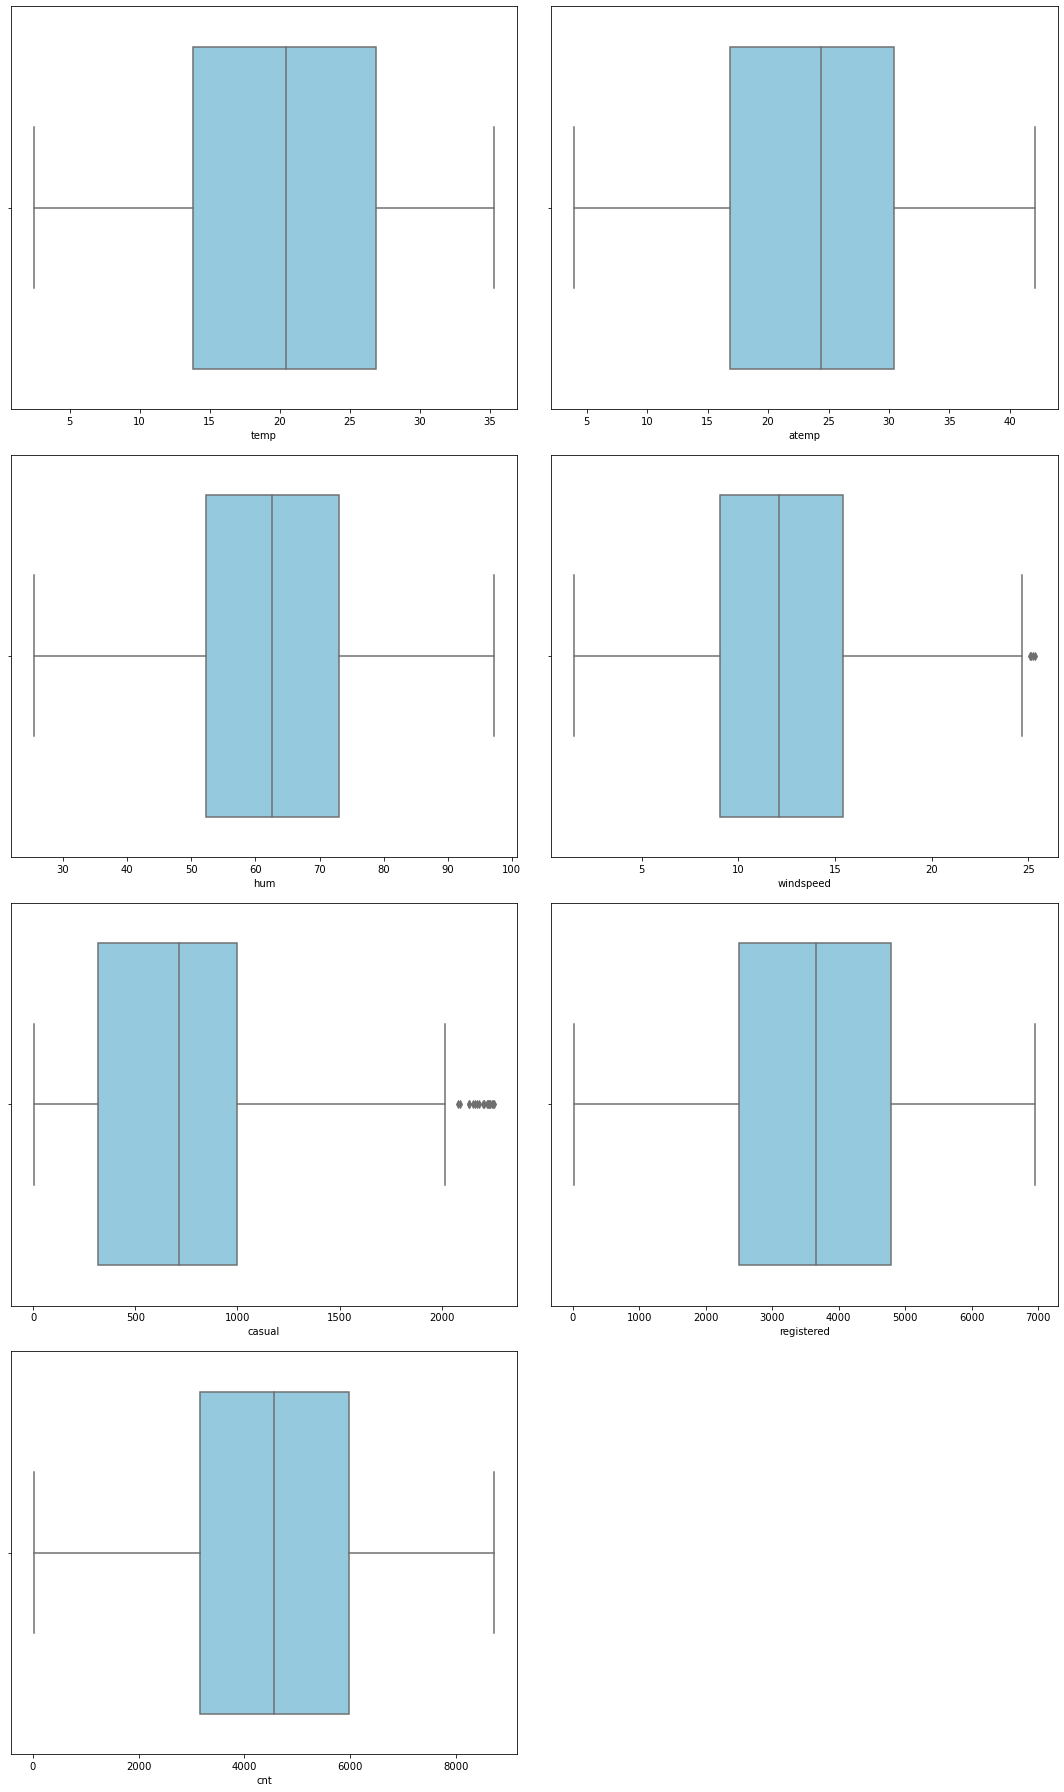

In [128]:
fig, axes = plt.subplots(4, 2, figsize=(15,25))

axes = axes.flat

for indice, columna in enumerate(numericas2.columns):
    sns.boxplot(x = numericas2[columna], data = df, ax=axes[indice], color = "skyblue"); # para trazar una línea de densidad

    
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

#### Eliminamos aquellas columnas no depuradas y las reemplazamos por aquellas depuradas:

In [129]:
lista_eliminar = numericas2.columns.to_list()
lista_eliminar

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [130]:
df2.drop(lista_eliminar, axis = 1, inplace=True)

In [131]:
df2.head(2)

,index,instant,dteday,estaciones,yr,mnth,holiday,workingday,weathersit,weekday_num,weekday_cat
0,0,1,2018-01-01,winter,0,1,0,0,2,0,monday
1,1,2,2018-02-01,winter,0,1,0,0,2,3,thursday


In [132]:
df2[numericas2.columns]= numericas2
df2.head(2)


,index,instant,dteday,estaciones,yr,mnth,holiday,workingday,weathersit,weekday_num,weekday_cat,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,1,2018-01-01,winter,0,1,0,0,2,0,monday,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,2,2018-02-01,winter,0,1,0,0,2,3,thursday,14.902598,17.68695,69.6087,16.652113,131,670,801


In [133]:
df2["yr"].unique()

array([0, 1])

### Correlaciones:

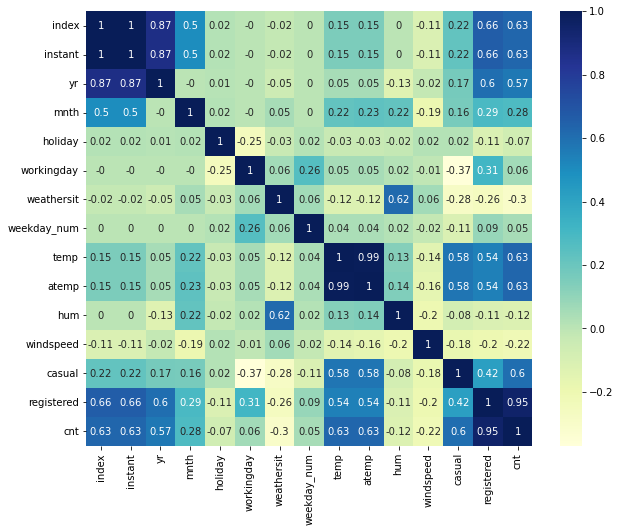

In [137]:
sns.heatmap(round(df2.corr(),2), 
           cmap = "YlGnBu",
           annot = True);

### ANOVA:

#### Modificación de columnas:

**sugerimos borrar:**

- *hum*: no nos aporta más información que weathersit
- *temp*: indicador objetivo, preferimos la temperatura percibida.
- *wind*: borramos. no es necesaria.

**nos quedamos con:**
- *weathersit*: cuatro categorías, nos da información sobre el tiempo.
- *atemp*: consideramos mejor la sensación térmica. 

En invierno este valor depende de la combinación de temperatura y viento, en verano es resultado de la combinación de temperatura y humedad relativa.  

 [referencia: meteo navarra](http://meteo.navarra.es/win/sensaciontermica.cfm#:~:text=Aunque%20la%20temperatura%20del%20aire,al%20igual%20que%20la%20temperatura.)

In [140]:
cols_que_quitar = ['hum', 'temp', 'windspeed']

In [141]:
df2.drop(cols_que_quitar, axis = 1, inplace=True)

KeyError: "['wind'] not found in axis"

#### Guardamos los datos:

In [134]:
df2.to_csv("datos/2.bikes.csv")

In [135]:
df2.to_pickle("datos/2.bikes.pkl")